<a href="https://colab.research.google.com/github/PARULCHUTANIPC/YOLO/blob/YOLO-V5/YOLO_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yolov5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy
import matplotlib.pyplot as plt

In [ ]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-12 Python-3.9.16 torch-2.0.0+cu118 CPU

100%|██████████| 40.8M/40.8M [00:00<00:00, 194MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
from PIL import Image, ImageDraw
image = Image.open('/content/bogie.jpg')
results = model(image)
results.print()

image 1/1: 395x550 1 person, 1 bicycle, 5 motorcycles, 1 truck
Speed: 22.4ms pre-process, 1000.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
boxes = results.xyxy[0].numpy()
class_indices = numpy.argmax(results.pred[0].numpy()[:, :-1], axis=1)
labels = [results.names[i] for i in class_indices]
scores = results.pred[0].numpy()[:, 4]

In [ ]:
color = (0, 255, 0)  # Green color
thickness = 2  # Line thickness
x1 = boxes[0][0]
x2 = boxes[0][2]-boxes[0][0]
y1 = boxes[0][1]
y2 = boxes[0][3] - boxes[0][1]
print(x1, x2, y1, y2)


376.35004 36.09726 24.729391 48.777153


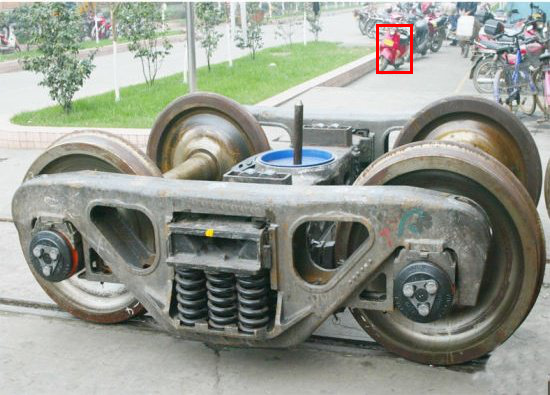

In [ ]:
draw = ImageDraw.Draw(image)

x1 = boxes[0][0]
x2 = boxes[0][2]
y1 = boxes[0][1]
y2 = boxes[0][3]

draw.rectangle((x1, y1, x2, y2), outline='red', width=3)

image.show()